###  Variance and intrinsic dimension

The intrinsic dimension is the number of PCA features that have significant variance. The intrinsic dimension informs dimension reduction, because it tells us how much a dataset can be compressed.The intrinsic dimension can be identified by counting the PCA features that have high variance. 

Having the knowledge of the intrinsic dimension, we'll be able to use PCA to identify it in real-world datasets that have thousands of features.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fish.csv", header = None)
df.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [3]:
df["species"] = df[0]

In [4]:
df = df.drop(0,axis = 1)


In [5]:
df["species"].unique()

array(['Bream', 'Roach', 'Smelt', 'Pike'], dtype=object)

In [6]:
labels = []

for i in df["species"]:
    if i == "Bream":
        labels.append(0)
    elif i == 'Roach':
        labels.append(1)
    elif i == 'Smelt':
        labels.append(2)
    elif i == 'Pike':
        labels.append(3)

In [7]:
df["labels"] = labels

In [8]:
samples = df.drop(["species", "labels"], axis=1).to_numpy()

In [9]:
#samples

#### Plotting the variances of PCA features

Let's see how to plot the variances of the PCA features in practice. Firstly, make the necessary imports. Then create a PCA model, and fit it to the samples. Now create a range enumerating the PCA features, and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.

In [10]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [11]:
# Create scaler: scaler
scaler = StandardScaler()

In [12]:
# Create a PCA instance: pca
pca = PCA()

In [13]:
# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

In [14]:
# Fit the pipeline to 'samples'
pipeline.fit(samples)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

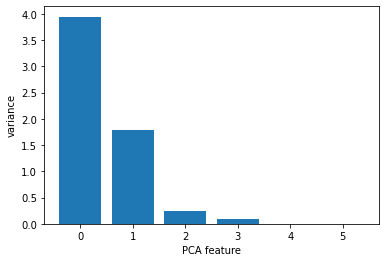

In [15]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

#### Variance and intrinsic dimension

The intrinsic dimension is the number of PCA features that have significant variance. In our example, It looks like PCA features 0 and 1 have significant variance. So this dataset has intrinsic dimension 2.

#### Dimension reduction

We know that, Dimension reduction represents the same data using less features and is vital for building machine learning pipelines using real-world data. 


We've seen already that the PCA features are in decreasing order of variance. PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.

###  Dimension reduction with PCA

To use PCA for dimension reduction, you need to specify how many PCA features to keep. For example, specifying n_components=2 when creating a PCA model tells it to keep only the first two PCA features. A good choice is the intrinsic dimension of the dataset, if you know it.

Now, Create a PCA model specifying n_components=2, and then fit the model and transform the samples as usual. 

In [16]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components = 2)

In [17]:
scaled_samples = scaler.fit_transform(samples)

In [18]:
# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

PCA(n_components=2)

In [19]:
# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

In [20]:
# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


Printing the shape of the transformed samples, we see that there are only two features, as expected.

In [21]:
xs = pca_features[:,0]
len(xs)

85

In [22]:
ys = pca_features[:,1]

In [23]:
species = df["species"].to_numpy()

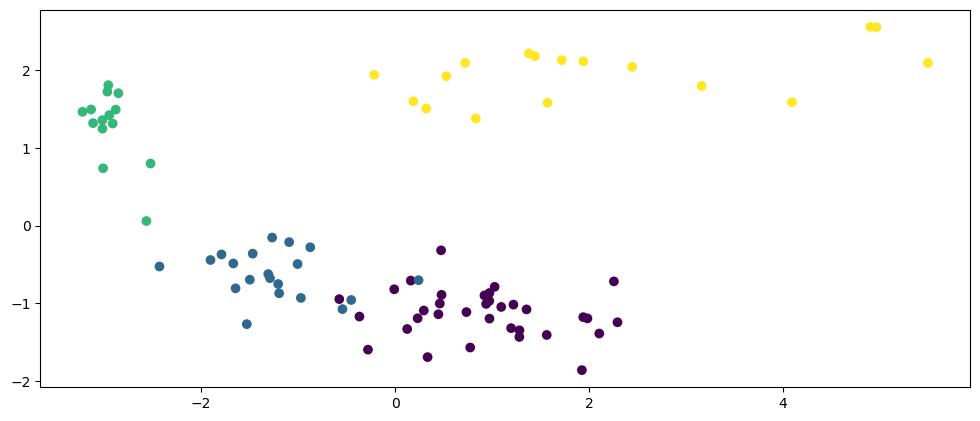

In [26]:
plt.figure(figsize = (12,5), dpi= 100)
plt.scatter(xs, ys, c = labels)
plt.show()

#### Fish dataset in 2 dimensions

Here is a scatterplot of the two PCA features, where the colors represent the 4 species of Fish. Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished. Remember that PCA didn't even know that there were distinct species. PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative.

PCA discards the low variance features, and assumes that the higher variance features are informative. Like all assumptions, there are cases where this doesn't hold. 